In [7]:
%matplotlib inline

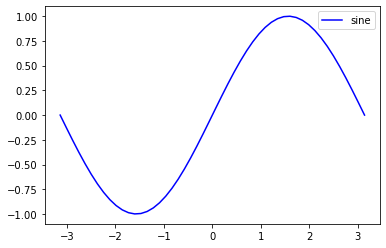

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)
plt.plot(x, y, 'b', label='sine')
plt.legend(loc='best')
plt.show()

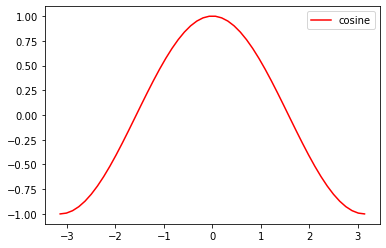

In [9]:
y2 = np.cos(x)
plt.plot(x, y2, 'r', label='cosine')
plt.legend(loc='best')
plt.show()

In [20]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=42)

for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k, p=2, weights='uniform').fit(X_train, y_train)
    print(f'For {k=}: {knn.score(X_test, y_test)=}')


For k=1: knn.score(X_test, y_test)=1.0
For k=3: knn.score(X_test, y_test)=1.0
For k=5: knn.score(X_test, y_test)=1.0
For k=7: knn.score(X_test, y_test)=1.0
For k=9: knn.score(X_test, y_test)=1.0


In [22]:
# To learn more about KNeighborsClassifier
KNeighborsClassifier?